# Compression Experiments using Real Data

# Imports

In [79]:
import networkx
import math
import scipy.optimize
import numpy as np
import sys
from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
import pywt
import scipy.fftpack
import random
import operator
import copy
from collections import deque
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D
from lib.io import *
from lib.vis import *
from lib.graph_signal_proc import *
from lib.syn import *
from lib.experiments import *
from lib.static import *
from lib.datasets import *

## Small Traffic

In [31]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic.data")
F = read_values(small_traffic["path"] + "traffic.data", G) 

In [32]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  100
#edges =  128


In [3]:
algs = [OptWavelets(n=20), OptWavelets(), GRCWavelets(), Fourier(), HWavelets()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_smt, time_smt = compression_experiment_static(G, np.array(F), algs, comp_ratios, 10)

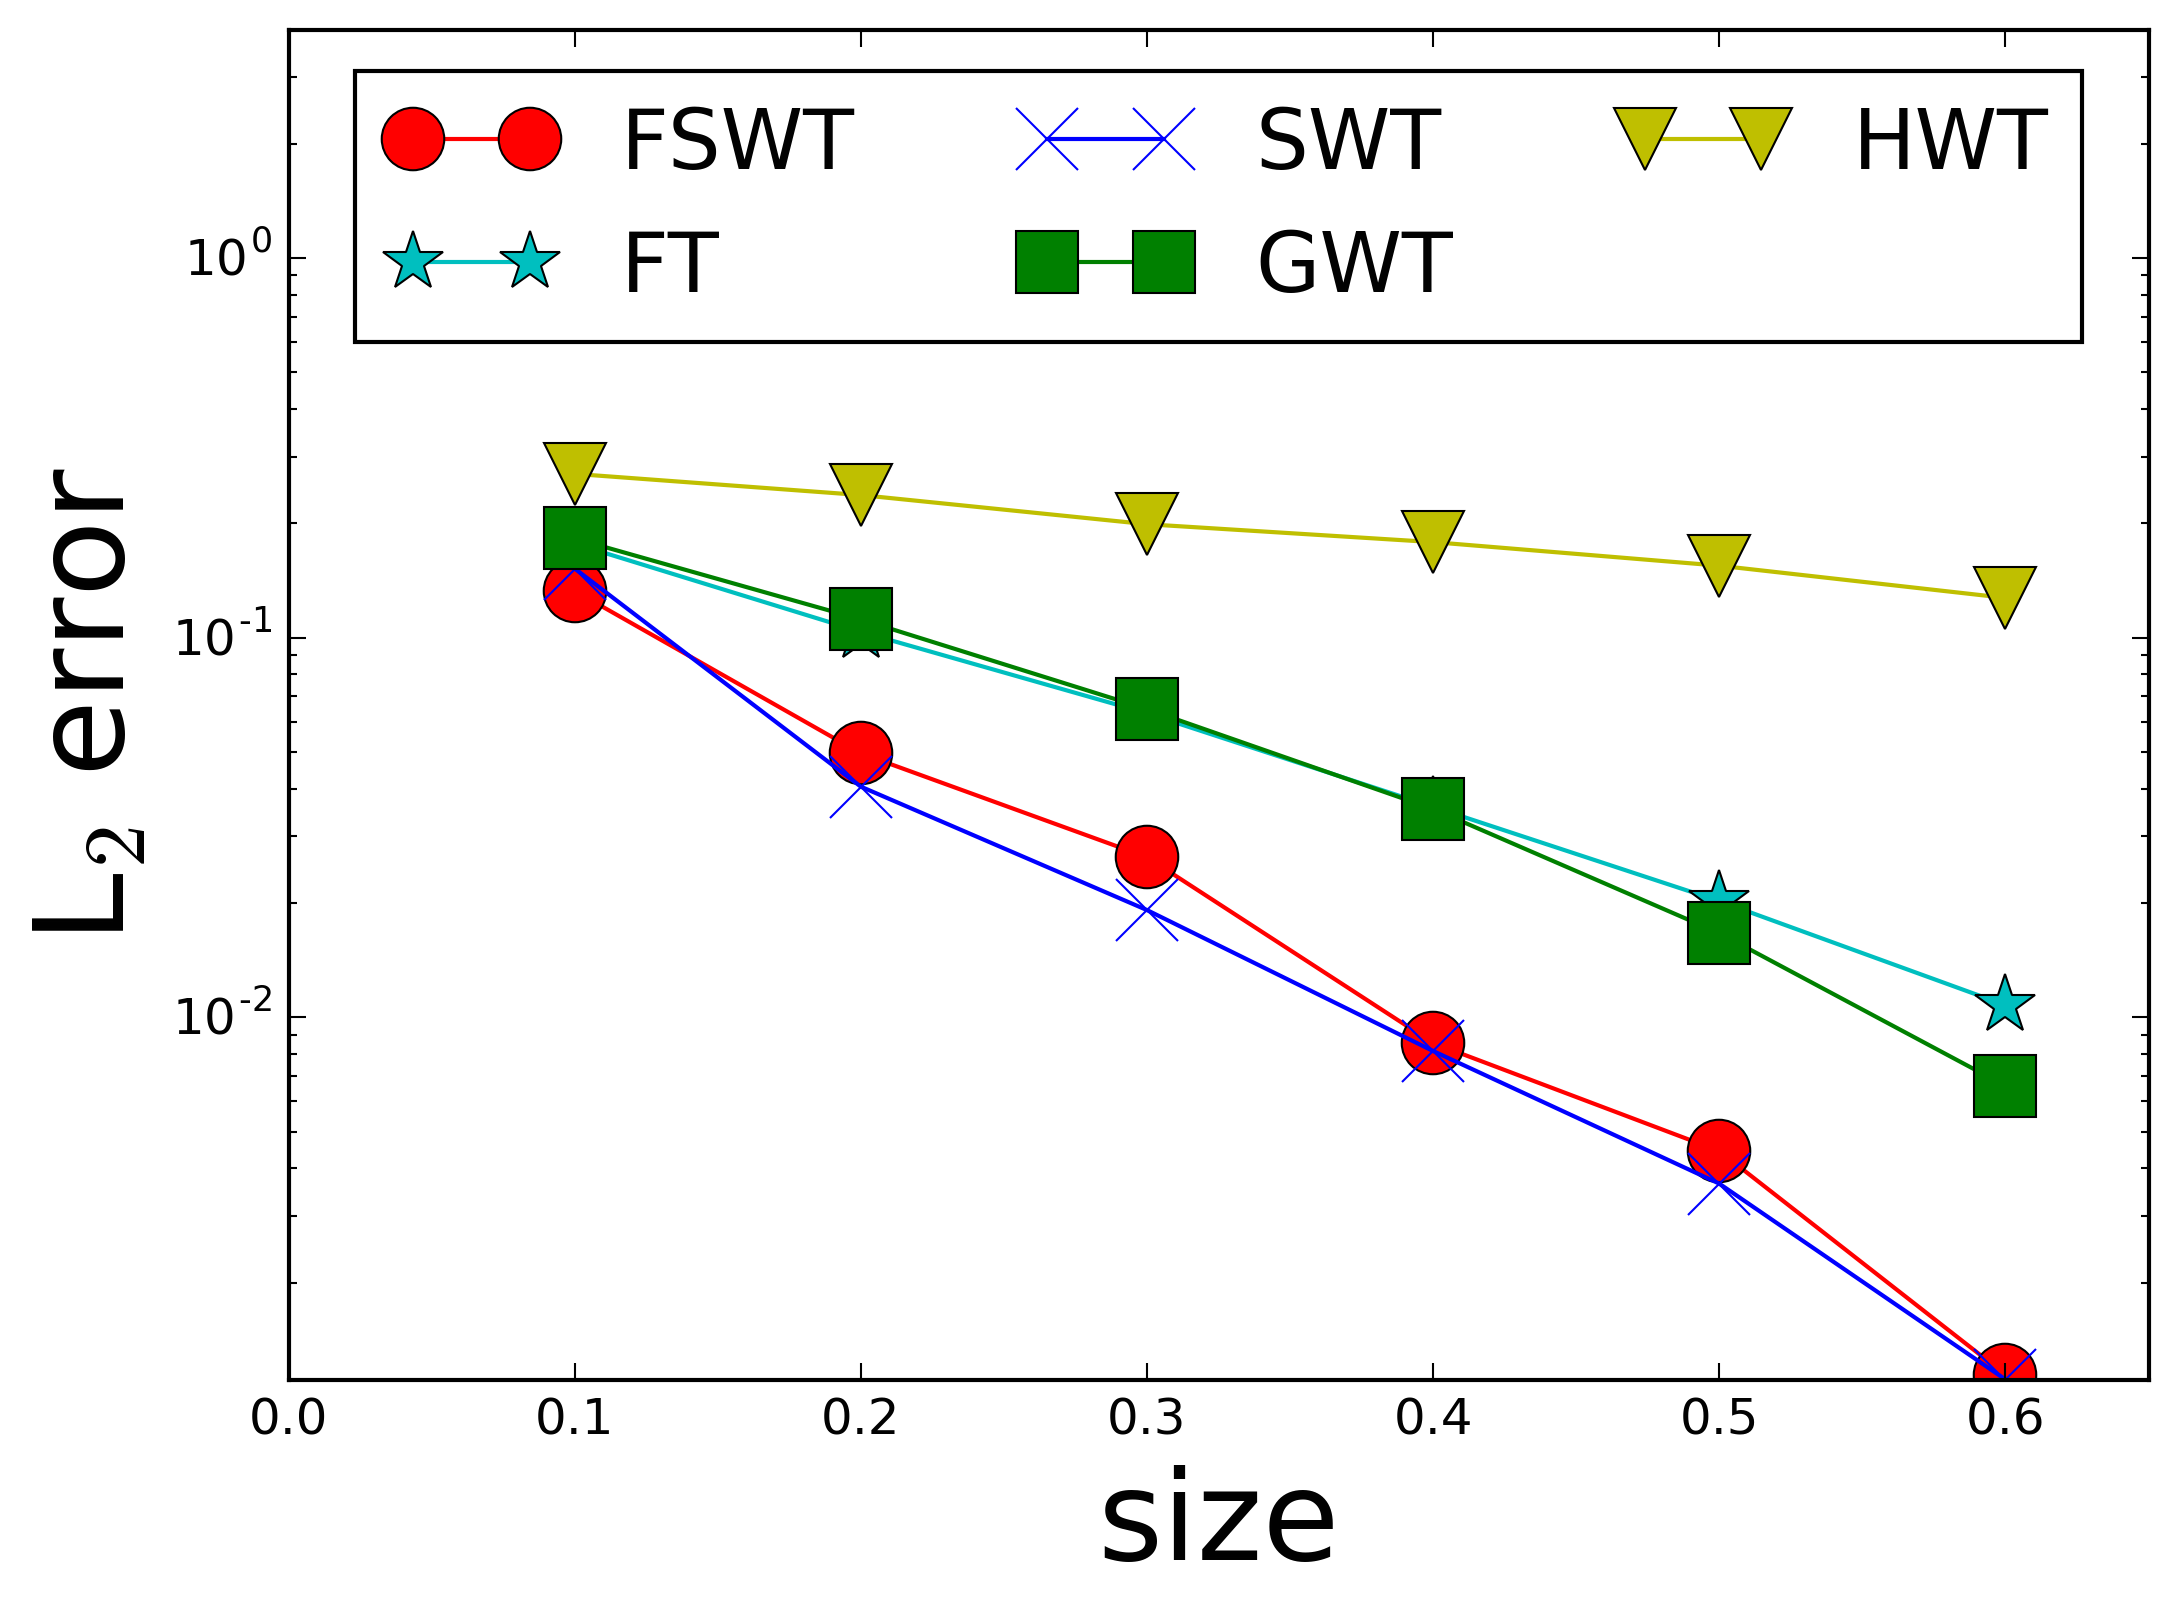

In [4]:
plot_compression_experiments(res_smt, comp_ratios, "figs/compression_small_traffic.png", 4)
Image(filename="figs/compression_small_traffic.png")

### FSWT x GWT

In [8]:
np.divide(res_smt['GWT'], res_smt['FSWT'])

array([ 1.37420233,  2.25282744,  2.45563924,  4.13498675,  3.74994093,
        5.76065338])

### SWT x GWT

In [9]:
np.divide(res_smt['GWT'], res_smt['SWT'])

array([ 1.19979191,  2.75735034,  3.38438616,  4.34140944,  4.56971652,
        5.93517785])

## Traffic

In [33]:
G = read_graph(traffic["path"] + "traffic.graph", traffic["path"] + "traffic.data")
F = read_values(traffic["path"] + "traffic.data", G) 

In [34]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  1923
#edges =  2659


In [6]:
algs = [OptWavelets(n=20), GRCWavelets(), Fourier()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_t, time_t = compression_experiment_static(G, F, algs, comp_ratios, 10)

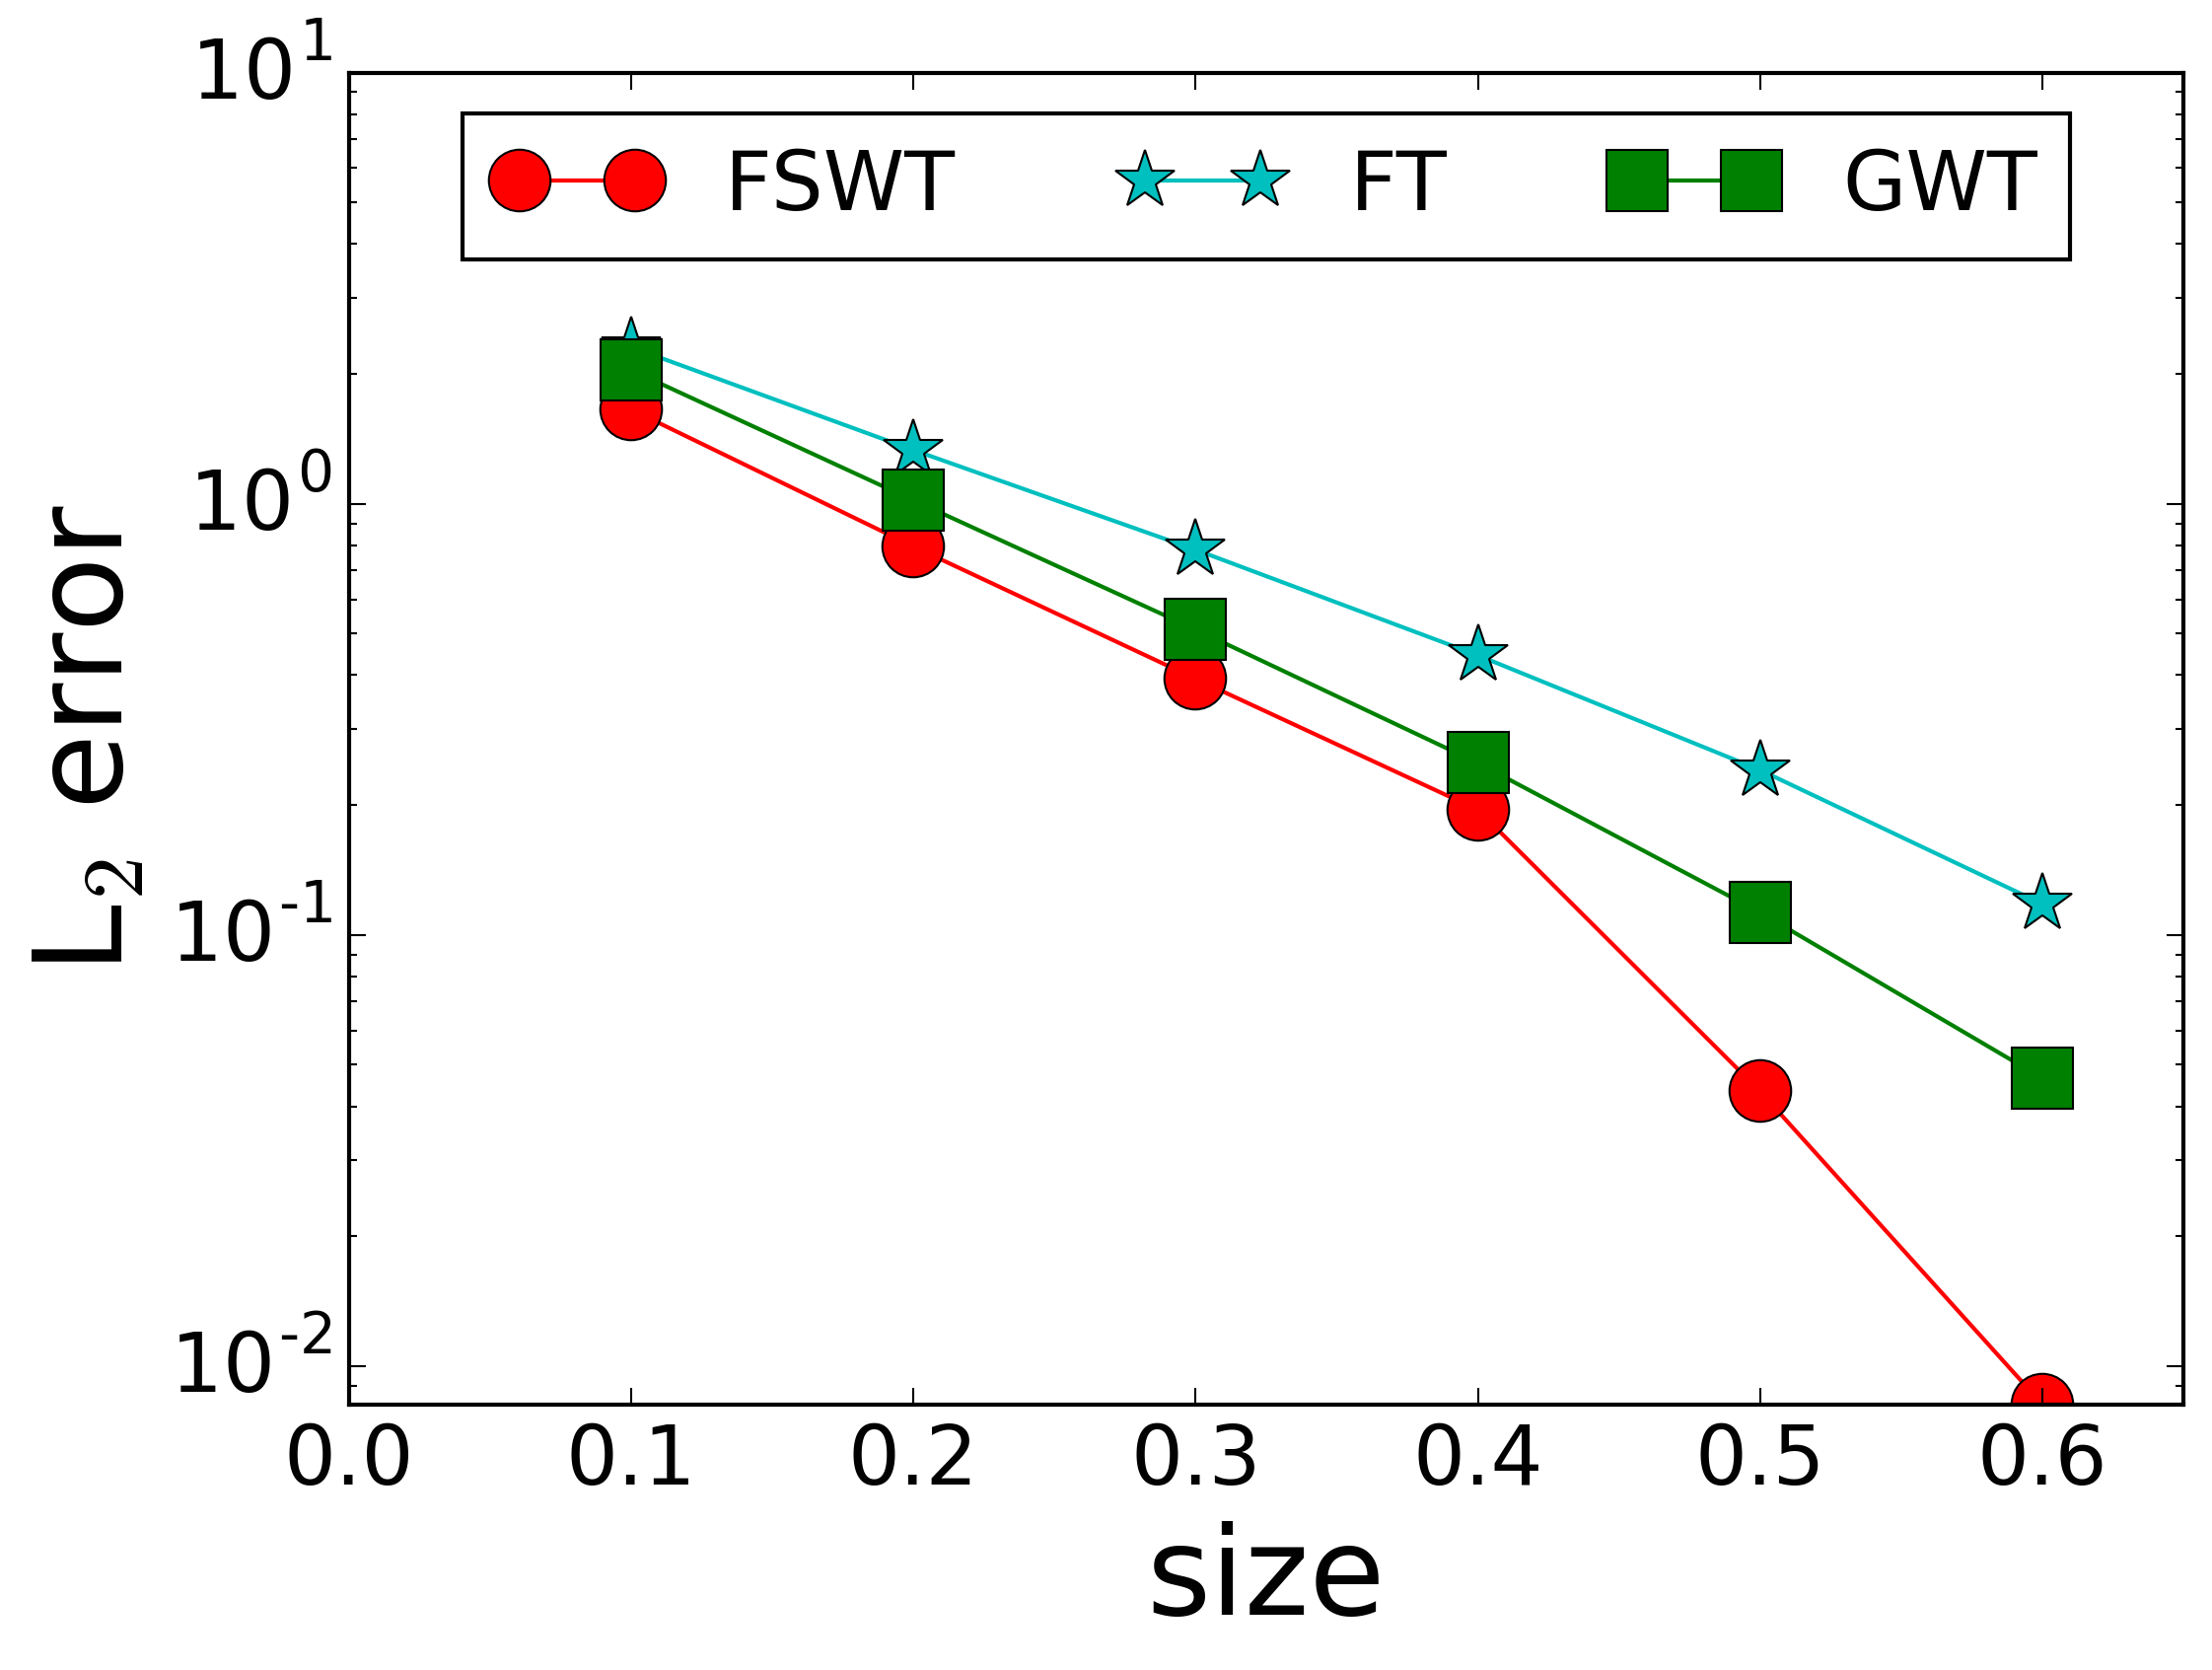

In [7]:
plot_compression_experiments(res_t, comp_ratios, "figs/compression_traffic.png", 10)
Image(filename="figs/compression_traffic.png")

### FSWT x GWT

In [10]:
np.divide(res_t['GWT'], res_t['FSWT'])

array([ 1.23442666,  1.27973632,  1.30163643,  1.28388523,  2.60036447,
        5.70455735])

## Human

In [61]:
G = read_graph(human["path"] + "human.graph", human["path"] + "human.data")
F = read_values(human["path"] + "human.data", G) 

In [62]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  845
#edges =  1272


In [63]:
algs = [OptWavelets(n=20), GRCWavelets(), Fourier()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_h, time_h = compression_experiment_static(G, F, algs, comp_ratios, 10)

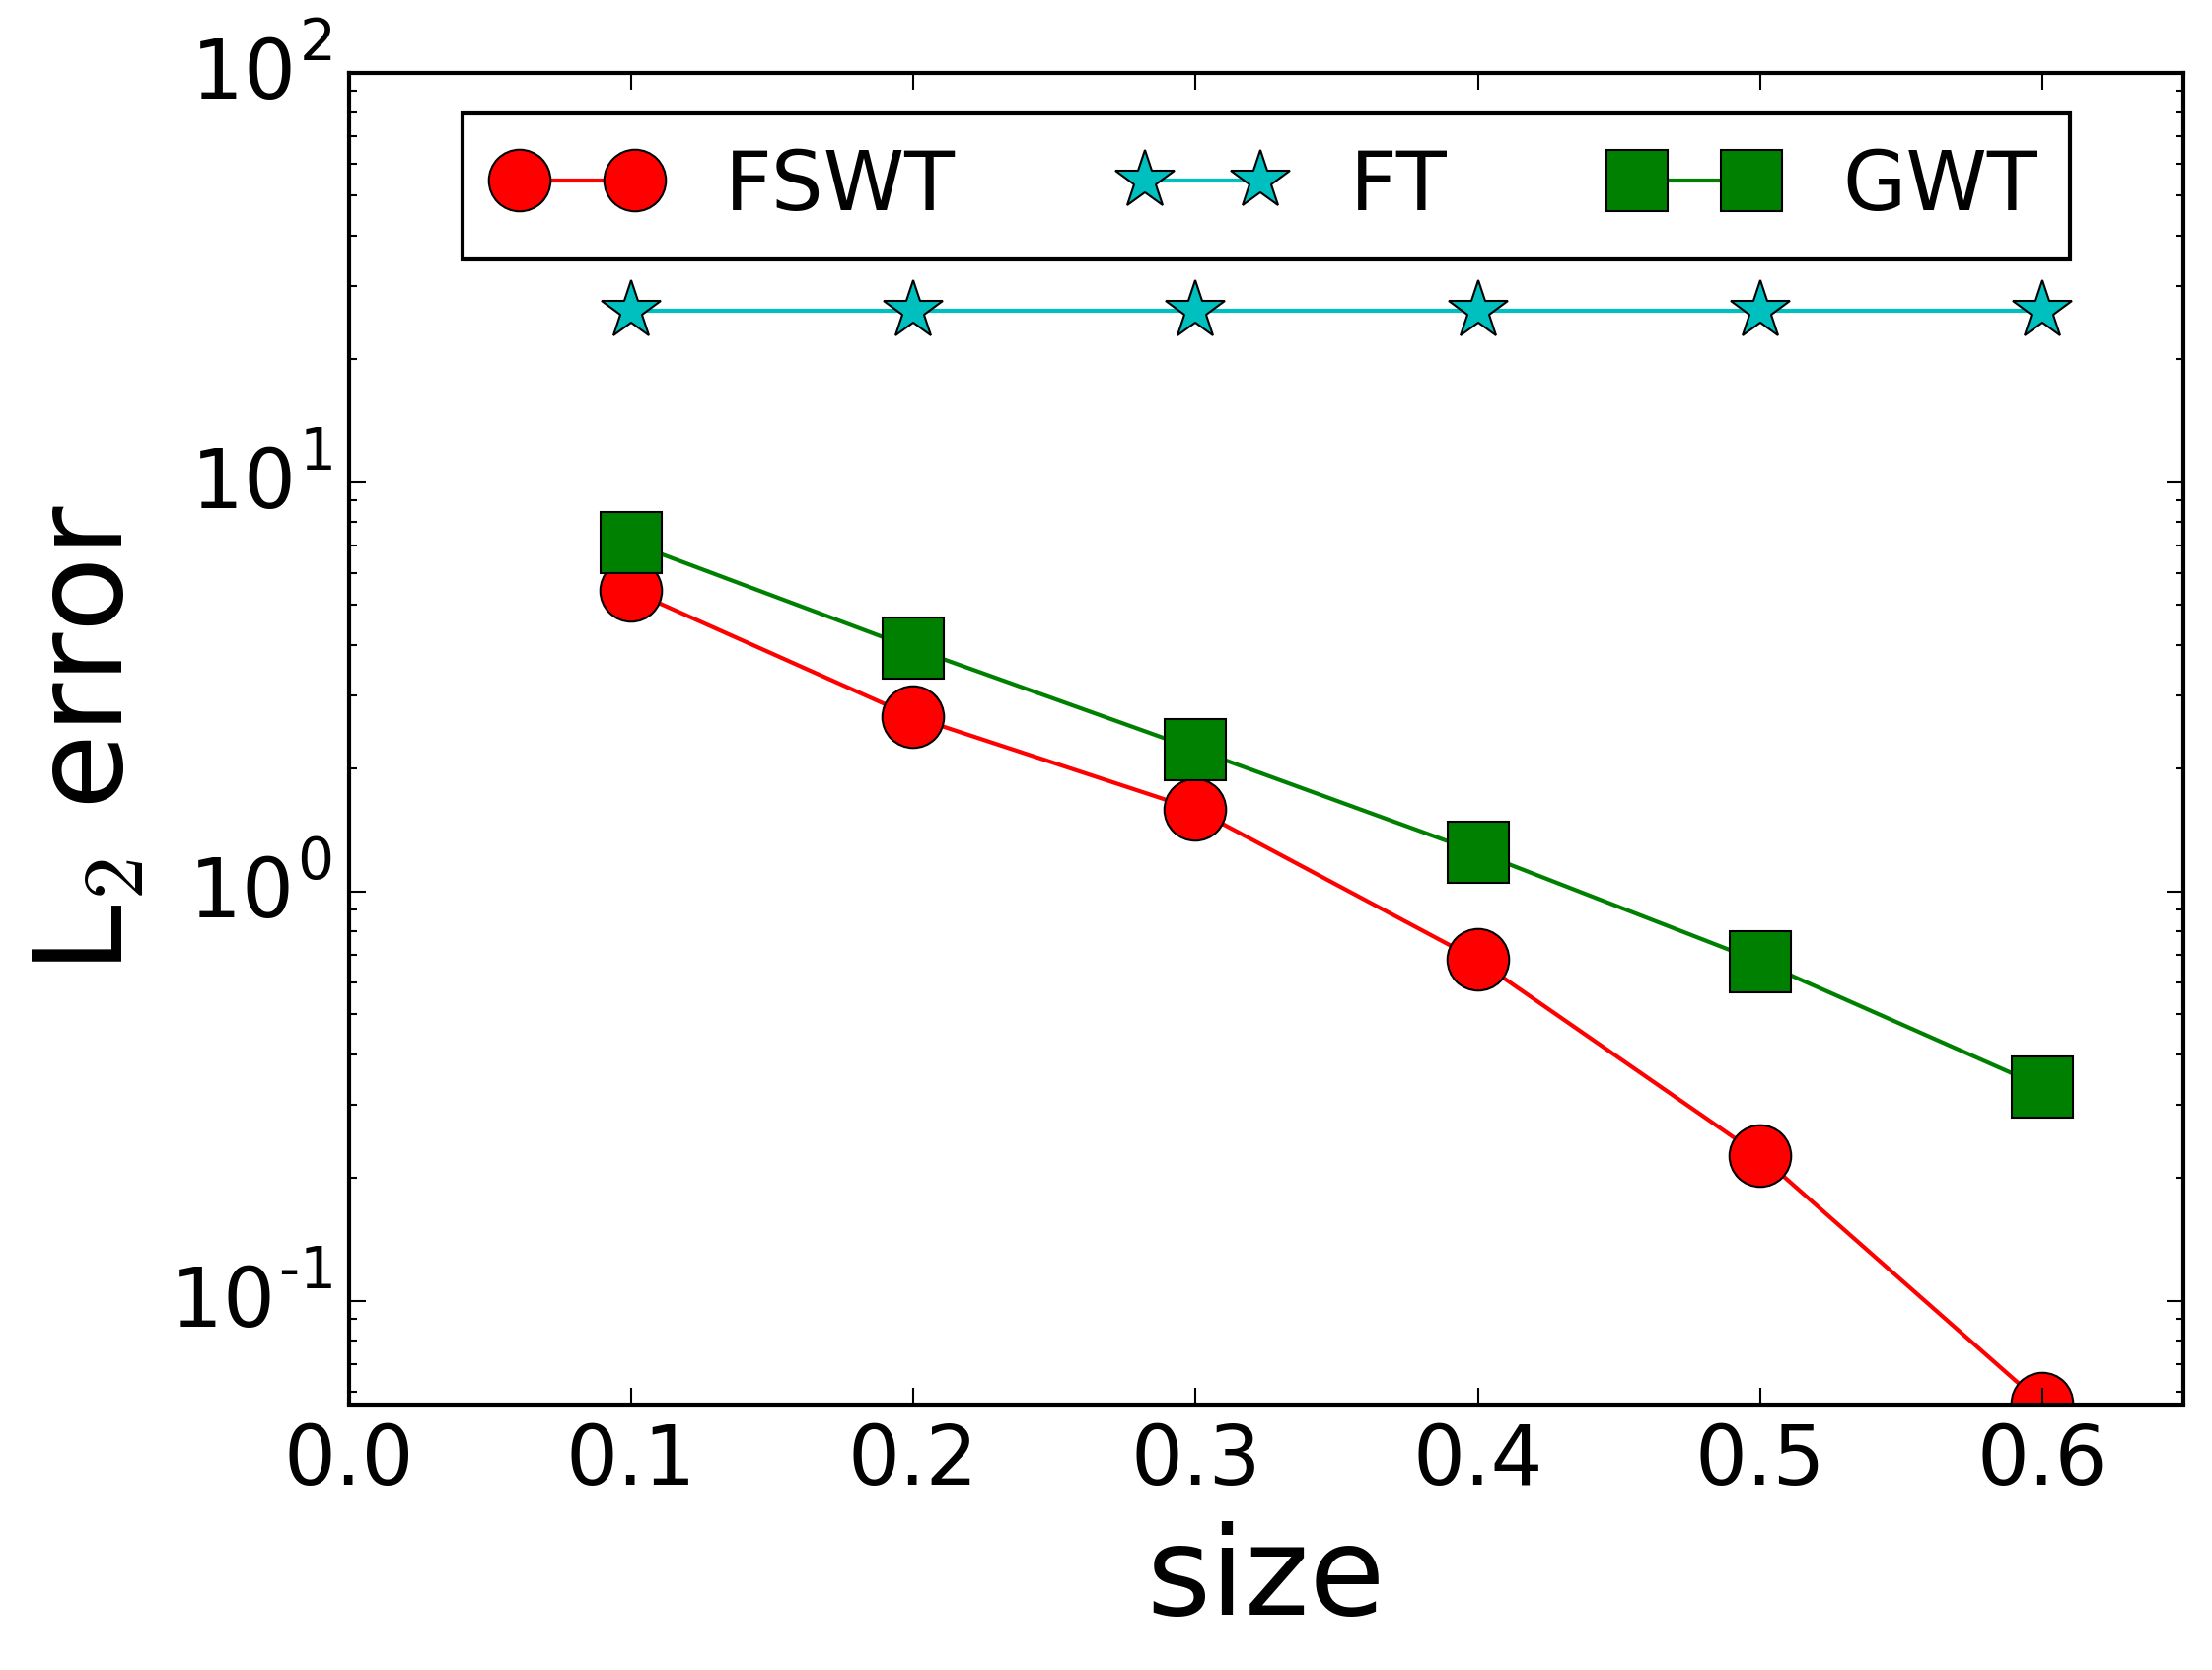

In [64]:
plot_compression_experiments(res_h, comp_ratios, "figs/compression_human.png", 100.)
Image(filename="figs/compression_human.png")

### FSWT x GWT

In [65]:
np.divide(res_h['GWT'], res_h['FSWT'])

array([ 1.30960783,  1.46880193,  1.40233368,  1.83547972,  2.97625452,
        5.96806709])

## Wikipedia

In [41]:
G = read_graph(wiki["path"] + "wiki.graph", wiki["path"] + "wiki.data")
F = read_values(wiki["path"] + "wiki.data", G) 

In [42]:
algs = [OptWavelets(n=20), GRCWavelets(), Fourier()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]
sys.setrecursionlimit(G.number_of_nodes())
res_w, time_w = compression_experiment_static(G, F, algs, comp_ratios, 10)

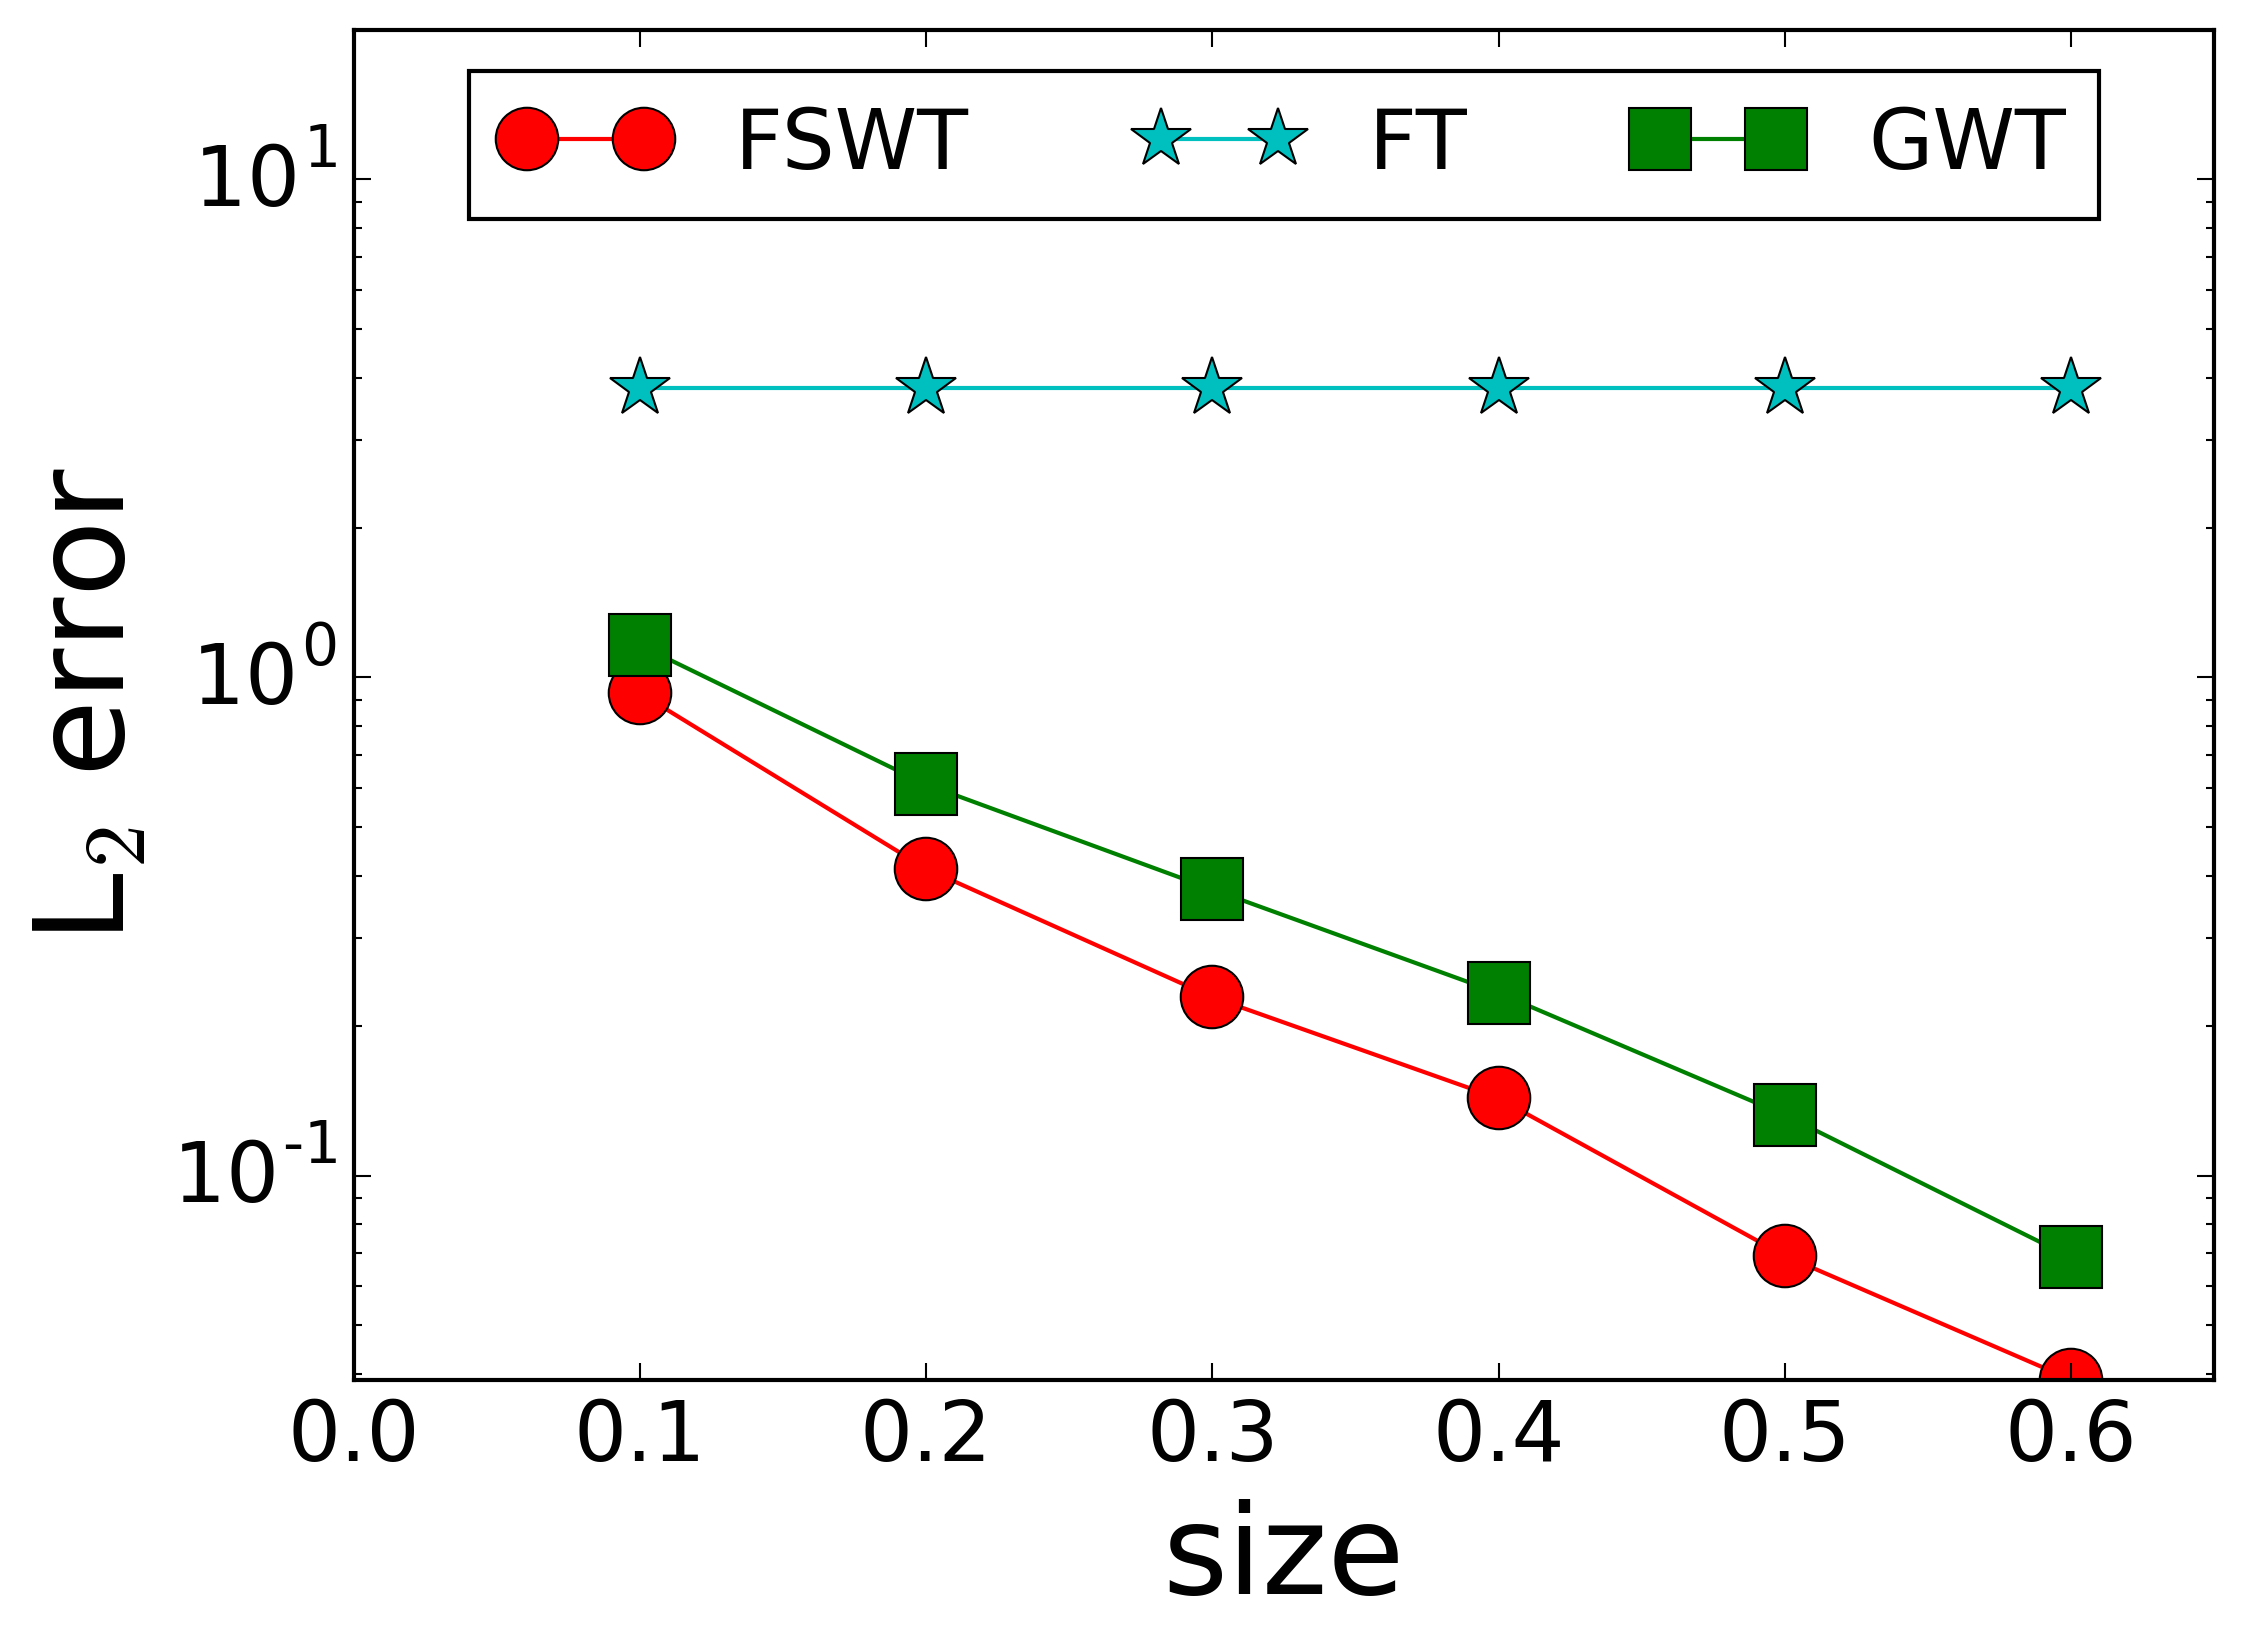

In [76]:
plot_compression_experiments(res_w, comp_ratios, "figs/compression_wiki.png", 20.)
Image(filename="figs/compression_wiki.png")

In [45]:
np.divide(res_w['GWT'], res_w['FSWT'])

array([ 1.24759097,  1.47684102,  1.64567719,  1.62750754,  1.91693145,
        1.75885185])

## Blogs

In [47]:
G = read_graph(polblogs["path"] + "polblogs.graph", polblogs["path"] + "polblogs.data")
F = read_values(polblogs["path"] + "polblogs.data", G) 

In [48]:
print("#vertices = ", G.number_of_nodes())
print("#edges = ", len(G.edges()))

#vertices =  1222
#edges =  16717


In [49]:
algs = [OptWavelets(n=20), GRCWavelets(), Fourier()]

comp_ratios = [0.1, 0.20, 0.30, 0.40, 0.50, 0.60]

res_b, time_b = compression_experiment_static(G, F, algs, comp_ratios, 10)

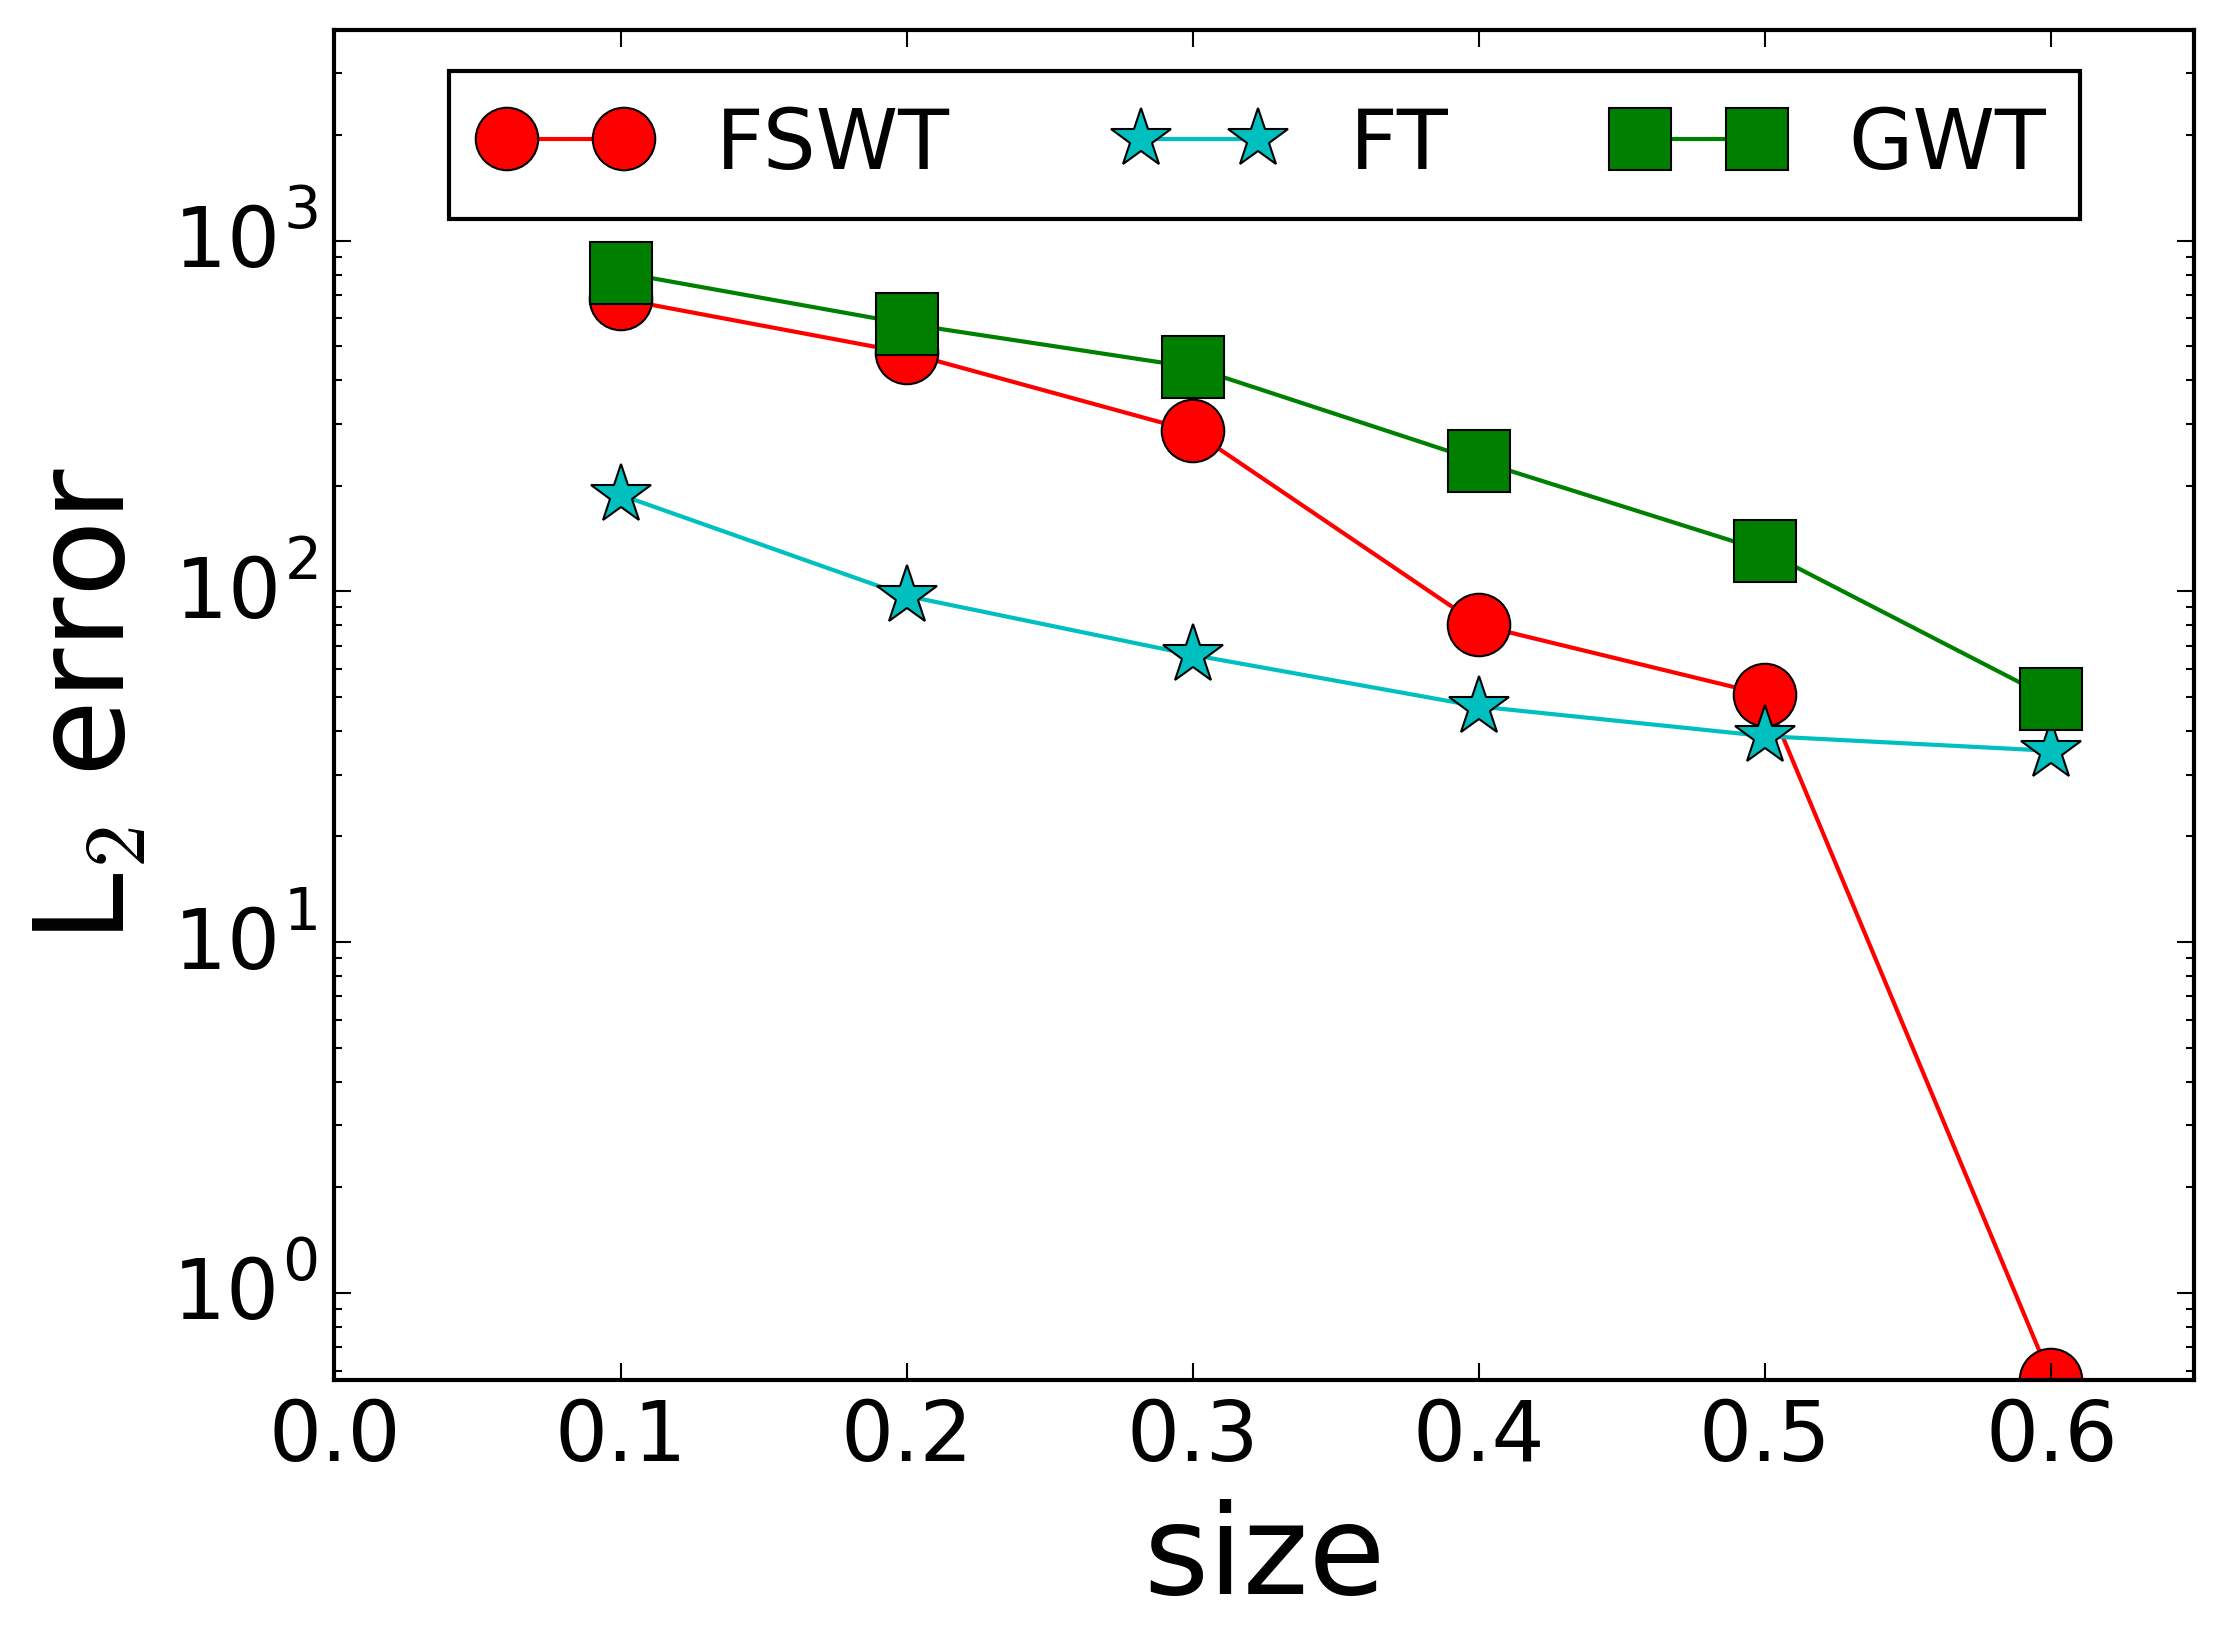

In [77]:
plot_compression_experiments(res_b, comp_ratios, "figs/compression_blog.png", 4000.)
Image(filename="figs/compression_blog.png")

### FSWT x FT

In [78]:
np.divide(res_b['GWT'], res_b['FSWT'])

array([  1.18970511,   1.20880759,   1.52070644,   2.9339968 ,
         2.56411917,  87.36908629])

## Average Computation times

### Small Traffic

In [70]:
for alg in time_smt:
    print(alg, " " ,np.mean(time_smt[alg]))

FT   0.0120865980784
FSWT   0.330213073889
SWT   0.693568921089
GWT   0.22568975687
HWT   8.12668774128


### Traffic

In [69]:
for alg in time_t:
    print(alg, " ", np.mean(time_t[alg]))

FT   35.4420957287
FSWT   18.375430127
GWT   5.96227147182


### Human

In [68]:
for alg in time_h:
    print(alg, " ", np.mean(time_h[alg]))

FT   2.81663463513
FSWT   14.0157053073
GWT   11.5385679166


### Wikipedia

In [72]:
for alg in time_w:
    print(alg, " ",np.mean(time_w[alg]))

FT   381.24113421
FSWT   424.825737035
GWT   386.143908437


### Blogs

In [67]:
for alg in time_b:
    print(alg, " ", np.mean(time_b[alg]))

FT   7.84694833755
FSWT   38.6995140592
GWT   47.0106969635
